In [26]:
import obspy
import os
import pickle
import datetime
import seisbench
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from picks_comparison import Picks_Comparison
import warnings
warnings.filterwarnings('ignore')
    

In [27]:
start_year_analysis = 2011
start_day_analysis = 90
end_year_analysis = 2011
end_day_analysis = 90
time_lag_threshold = 500 # mi second

# catalog: Nooshin_catalog, Cristian_catalog, Jonas_catalog, Jorge_catalog, Nazia_catalog, Vaclav_catalog
# GT: EQT_catalog_Nooshin_days, EQT_catalog_Cristian_days, EQT_catalog_Jonas_days, EQT_catalog_Jorge_days, 
# EQT_catalog_Nazia_days, EQT_catalog_Vaclav_days
catalog = 'EQT_Instnace_CJN'
GT = 'EQT_Instance'

title = '{0}{1}'.format(catalog,' catalog')
y_label_P = '{0}{1}{2}'.format(' Ground truth (', GT, ')' + '\n' +' Number of P picks')
y_label_S = '{0}{1}{2}'.format(' Ground truth (', GT, ')' + '\n' +' Number of S picks')

##### EQT-Instnace & EQT-Instnace-CJN picks evaluation

In [28]:
if catalog =='EQT_Instnace_CJN':
    picker_picks_file_path= '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQT_Instance_CJN/all_days/EQT_Instnace_CJN.pkl'
    with open(picker_picks_file_path,'rb') as fp:
        event_picks= pickle.load(fp)
    

if GT == 'EQT_Instance':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog/EQT_Instance/all_days/EQT_Instnace.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)

    Ground_truth.sort_values(by=['timestamp'], inplace=True)

##### Nooshin picks evaluation

In [29]:
if catalog =='Nooshin_catalog':
    picker_picks_file_path= '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Nooshin/Manual/Cleaned/Nooshin_picks.pkl'
    with open(picker_picks_file_path,'rb') as fp:
        event_picks= pickle.load(fp)
    

if GT == 'EQT_catalog_Cristian_days':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Nooshin/Instance/EQT_Nooshin_picks.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)

    Ground_truth.sort_values(by=['timestamp'], inplace=True)
    

##### Cristian picks evaluation

In [30]:
if catalog =='Cristian_catalog':
    picker_picks_file_path= '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Cristian/Manual/cleaned/Cristian_picks.pkl'
    with open(picker_picks_file_path,'rb') as fp:
        event_picks= pickle.load(fp)
    

if GT == 'EQT_catalog_Cristian_days':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Cristian/Instance/All/EQT_Cristian_picks.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)

    Ground_truth.sort_values(by=['timestamp'], inplace=True)
    

##### Jonas picks evaluation

In [31]:
if catalog =='Jonas_catalog':
    picker_picks_file_path= '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Jonas/Manual/Cleaned/Jonas_picks.pkl'
    with open(picker_picks_file_path,'rb') as fp:
        event_picks= pickle.load(fp)
    

if GT == 'EQT_catalog_Jonas_days':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Jonas/Instance/All/EQT_Jonas_picks.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)

    Ground_truth.sort_values(by=['timestamp'], inplace=True)
    

##### Jorge picks evaluation

In [32]:
if catalog =='Jorge_catalog':
    picker_picks_file_path= '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Jorge/Manual/Cleaned/Jorge_picks.pkl'
    with open(picker_picks_file_path,'rb') as fp:
        event_picks= pickle.load(fp)
    

if GT == 'EQT_catalog_Jorge_days':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Jorge/Instance/All/EQT_Jorge_picks.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)

    Ground_truth.sort_values(by=['timestamp'], inplace=True)
    

##### Nazia picks evalaution

In [33]:
if catalog =='Nazia_catalog':
    picker_picks_file_path= '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Nazia/Manual/Cleaned/Nazia_picks.pkl'
    with open(picker_picks_file_path,'rb') as fp:
        event_picks= pickle.load(fp)
    

if GT == 'EQT_catalog_Nazia_days':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Nazia/Instance/EQT_Nazia_picks.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)

    Ground_truth.sort_values(by=['timestamp'], inplace=True)
    

##### Vaclav picks evalaution

In [34]:
if catalog =='Vaclav_catalog':
    picker_picks_file_path= '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Vaclav/Manual/Cleaned/Vaclav_picks.pkl'
    with open(picker_picks_file_path,'rb') as fp:
        event_picks= pickle.load(fp)
    

if GT == 'EQT_catalog_Vaclav_days':
    Ground_truth_file_path = '/home/javak/Sample_data_chile/Events_catalog/Manual picks/Vaclav/Instance/All/EQT_Vaclav_picks.pkl'
    with open(Ground_truth_file_path,'rb') as fp:
        Ground_truth = pickle.load(fp)

    Ground_truth.sort_values(by=['timestamp'], inplace=True)
    

In [35]:
Ground_truth[Ground_truth['type']=='p'].shape


(14247, 4)

In [36]:
Ground_truth[Ground_truth['type']=='s'].shape

(8943, 4)

In [37]:
#event_picks[event_picks['phase_hint']=='P'].shape

In [38]:
#event_picks[event_picks['phase_hint']=='S'].shape

In [39]:
picks_obj = Picks_Comparison (start_year_analysis, 
                start_day_analysis,
                end_year_analysis,
                end_day_analysis,event_picks, Ground_truth)

all_dists_p, all_dists_s = picks_obj()

In [40]:
print('result with 0.5 second')
print('Number of P picks',all_dists_p.shape)
print('Number of S picks',all_dists_s.shape)
print('Recovery Rate P',(all_dists_p[np.abs(all_dists_p) < 500].shape[0])/all_dists_p.shape[0])
print('Recovery Rate S',(all_dists_s[np.abs(all_dists_s) < 500].shape[0])/all_dists_s.shape[0])


result with 0.5 second
Number of P picks (14247,)
Number of S picks (8943,)
Recovery Rate P 0.686249736786692
Recovery Rate S 0.8478139326847814


In [41]:
print('result with 5 and 2.9 seconds')
print('Number of P picks',all_dists_p.shape)
print('Number of S picks',all_dists_s.shape)
print('Recovery Rate P',(all_dists_p[np.abs(all_dists_p) < 2942].shape[0])/all_dists_p.shape[0])
print('Recovery Rate S',(all_dists_s[np.abs(all_dists_s) < 5000].shape[0])/all_dists_s.shape[0])

result with 5 and 2.9 seconds
Number of P picks (14247,)
Number of S picks (8943,)
Recovery Rate P 0.7184670456938302
Recovery Rate S 0.8818069998881807


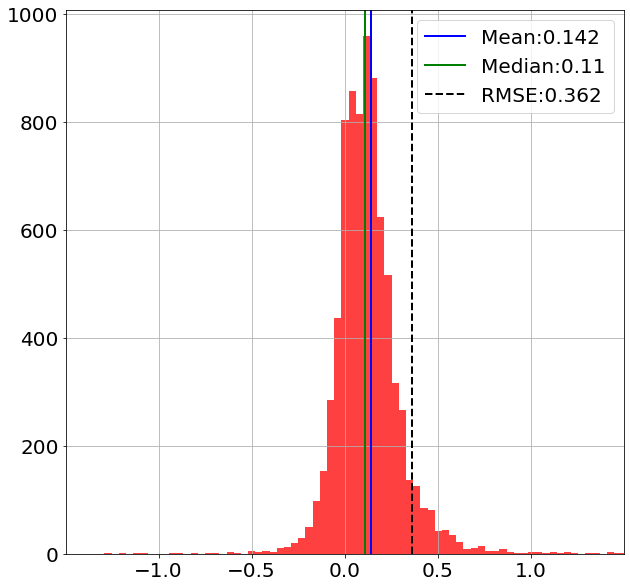

In [42]:
# Filter the time lag with the given threshold and capture the picks with more than .. second time lag
dists_filter_lag_time_m=all_dists_s[np.abs(all_dists_s) < 2000]/1000

# Perform S picks Quality control of PhaseNet by using existing S picks catalog with more than a given time lag
fig_lag_m, ax_lag_m = plt.subplots(figsize=(30,10))

#label_more = '{0}{1}'.format('Recovery ratio \nof S picks with less than \n0.5 seconds: ', round (all_dists_s[np.abs(all_dists_s) < time_lag_threshold].shape[0]/all_dists_s.shape[0],3))

n_lag_m, bins_lag_m, patches_lag_m = ax_lag_m.hist(dists_filter_lag_time_m, 100, density=False, facecolor='r', alpha=0.75)
#steps = (max(dists_filter_lag_time_m) - min(dists_filter_lag_time_m))/40
steps = 0.5
plt.xticks(np.arange(-1, 1.1, step=steps))
#plt.xlabel('Time residual (s)', fontsize=25)
#plt.ylabel(y_label_S, fontsize=25, labelpad=-7)
#plt.title(title, fontsize=32)
fig_lag_m.set_size_inches(10,10)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)


filter_tim_lag = all_dists_s[np.abs(all_dists_s) < 5000]/1000
mean = np.mean(filter_tim_lag)
median = np.median(filter_tim_lag)
#mean = np.sum(filter_tim_lag)/filter_tim_lag.shape[0]
RMSE = np.sqrt (np.sum(filter_tim_lag**2)/filter_tim_lag.shape[0])
plt.axvline(mean, color='blue', label='Mean:'+str(round (mean,3)),linewidth=2)
plt.axvline(median, color='green', label='Median:'+str(round (median,3)),linewidth=2)
plt.axvline(RMSE, color='black', label='RMSE:'+str(round (RMSE,3)), linestyle="--", linewidth=2)

#plt.title('Common S picks distribution with less than 2 seconds time residual (2012-01-01 to 2012-12-31)', fontsize=24, pad=23)
#plt.xlim(min(bins_lag_m), max(bins_lag_m))
plt.xlim([-1.5,1.5])
plt.grid(True)
plt.legend(loc='upper right', fontsize=20)
plt.show()

# Save png file in the export_DF_path IPOC_vs_HAND_PICKED(GT)_S
file_name = '{0}{1}{2}{3}.{extention}'.format(catalog,'_vs_',GT,'(GT)_S', extention='pdf')
fig_lag_m.savefig(os.path.join('/home/javak/Sample_data_chile/Events_catalog/Manual picks/Pickers_evalaution', file_name), facecolor = 'w',bbox_inches='tight')



In [43]:
mean

0.1417765660664469

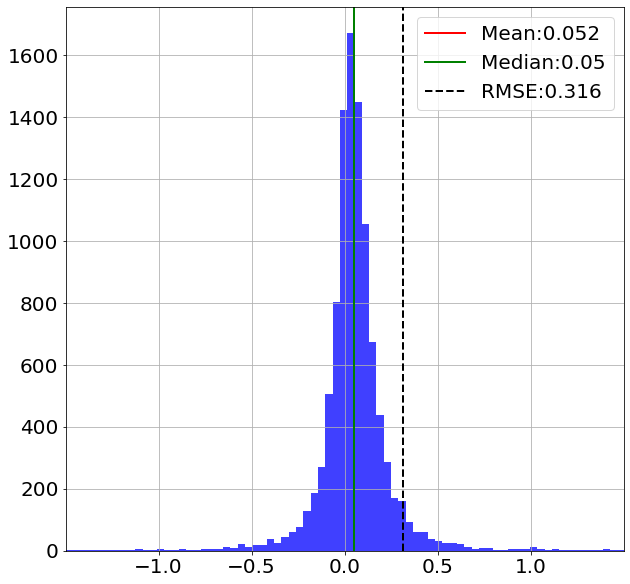

In [44]:
# Filter the time lag with the given threshold and capture the picks with more than .. second time lag
dists_filter_lag_time_m=all_dists_p[np.abs(all_dists_p) < 2000]/1000

# Perform S picks Quality control of PhaseNet by using existing S picks catalog with more than a given time lag
fig_lag_m, ax_lag_m = plt.subplots(figsize=(40,10))
fig_lag_m.set_size_inches(10,10)
#label_more = '{0}{1}'.format('Recovery ratio of P picks with less than 0.5 seconds: ', round (all_dists_p[np.abs(all_dists_p) < time_lag_threshold].shape[0]/all_dists_p.shape[0],3))

n_lag_m, bins_lag_m, patches_lag_m = ax_lag_m.hist(dists_filter_lag_time_m, 100, density=False, facecolor='blue', alpha=0.75)
#steps = (max(dists_filter_lag_time_m) - min(dists_filter_lag_time_m))/40

steps = 0.5
plt.xticks(np.arange(-1, 1.1, step=steps))
#plt.xlabel('Time residual (s)', fontsize=25)
#plt.ylabel(y_label_P, fontsize=25, labelpad=-7)
#plt.title(title, fontsize=32)
fig_lag_m.set_size_inches(10,10)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

filter_tim_lag = all_dists_p[np.abs(all_dists_p) < 2942]/1000
mean = np.mean(filter_tim_lag)
median = np.median(filter_tim_lag)
#MAE = np.sum(filter_tim_lag)/filter_tim_lag.shape[0]
RMSE = np.sqrt (np.sum(filter_tim_lag**2)/filter_tim_lag.shape[0])
plt.axvline(mean, color='red', label='Mean:'+str(round (mean,3)),linewidth=2)
plt.axvline(median, color='green', label='Median:'+str(round (median,3)),linewidth=2)
plt.axvline(RMSE, color='black', label='RMSE:'+str(round (RMSE,3)), linestyle="--", linewidth=2)

#plt.title('Common S picks distribution with less than 2 seconds time residual (2012-01-01 to 2012-12-31)', fontsize=24, pad=23)
#plt.xlim(min(bins_lag_m), max(bins_lag_m))
plt.xlim([-1.5,1.5])
plt.grid(True)
plt.legend(loc='upper right', fontsize=20)
plt.show()

# Save png file in the export_DF_path IPOC_vs_HAND_PICKED(GT)_S
file_name = '{0}{1}{2}{3}.{extention}'.format(catalog,'_vs_',GT,'(GT)_P', extention='pdf')
fig_lag_m.savefig(os.path.join('/home/javak/Sample_data_chile/Events_catalog/Manual picks/Pickers_evalaution', file_name), facecolor = 'w',bbox_inches='tight')